In [1]:
#!pip install git+https://github.com/octosport/octopy.git

!ls -l

total 1624
-rw-r--r--   1 toni  staff    8097 Oct 23 11:05 Building_a_Simple_Football_Prediction_Model_Using_Machine_Learning.ipynb
-rw-r--r--@  1 toni  staff  365093 Nov 10 23:47 Generate_Octopy_ELO_Features.ipynb
-rw-r--r--   1 toni  staff  225590 Oct 25 22:16 Liga_Rating_and_Predicting_Liga_with_Recurrent_Neural_Network_and JAX.ipynb
-rw-r--r--   1 toni  staff  223819 Oct 25 00:24 Rating_and_Predicting_Football_with_Recurrent_Neural_Network_and JAX.ipynb
drwxr-xr-x  10 toni  staff     320 Oct 25 21:39 octopy


In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from octopy.elo import dataset
from octopy.elo import elo

#get the data
data = pd.read_csv('https://raw.githubusercontent.com/octosport/octopy/master/data/epl.csv')
#data = pd.read_csv('../data/jax_elo_dataset.csv')

#format the data
elo_data = dataset.EloDataset(valid_date= '2019-06-01',test_date= '2020-06-01',time= data['date'])

#split the data
elo_data.split_train_test(data[['home','away']].values,data[['home_goals','away_goals']].values)

#build the model and train
model = elo.EloRatingNet(elo_data.n_teams_)
model.optimise(elo_data,learning_rate=0.1)

dataset split using date: train size 1140, validation size 288, test size 492


  0%|          | 0/10000 [00:00<?, ?it/s]

train_loss: 1.0173, valid_loss: 1.0619, test_loss: 1.0358
train_loss: 0.9710, valid_loss: 1.0139, test_loss: 1.0159
train_loss: 0.9703, valid_loss: 1.0134, test_loss: 1.0155
train_loss: 0.9696, valid_loss: 1.0130, test_loss: 1.0152
train_loss: 0.9689, valid_loss: 1.0126, test_loss: 1.0148
train_loss: 0.9682, valid_loss: 1.0121, test_loss: 1.0145
train_loss: 0.9674, valid_loss: 1.0116, test_loss: 1.0140
train_loss: 0.9666, valid_loss: 1.0111, test_loss: 1.0136
train_loss: 0.9657, valid_loss: 1.0105, test_loss: 1.0131
train_loss: 0.9647, valid_loss: 1.0099, test_loss: 1.0125
train_loss: 0.9636, valid_loss: 1.0092, test_loss: 1.0119
train_loss: 0.9625, valid_loss: 1.0085, test_loss: 1.0112
train_loss: 0.9612, valid_loss: 1.0077, test_loss: 1.0105
train_loss: 0.9599, valid_loss: 1.0069, test_loss: 1.0096
train_loss: 0.9584, valid_loss: 1.0061, test_loss: 1.0086
train_loss: 0.9568, valid_loss: 1.0053, test_loss: 1.0076
train_loss: 0.9551, valid_loss: 1.0045, test_loss: 1.0064
train_loss: 0.

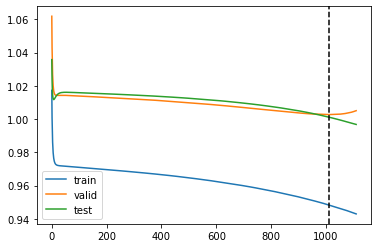

In [3]:
#plot the path loss
pd.DataFrame(model.loss_path_,columns=['train','valid','test']).plot()
plt.axvline(x=model.best_params_['n_iter'],c='black',linestyle='--')

In [4]:
last_rating = pd.DataFrame(model.output_['carry']['rating'],index=elo_data.le_.classes_,columns=['last rating']) .sort_values('last rating',ascending=False)
last_rating
 

,last rating
Manchester City,1001.166748
Liverpool,1001.047729
Chelsea,1000.845337
Manchester United,1000.841187
Tottenham Hotspur,1000.777039
Arsenal,1000.671021
Leicester City,1000.610291
Everton,1000.579163
West Ham United,1000.553345
Wolverhampton,1000.498535


<AxesSubplot:xlabel='date'>

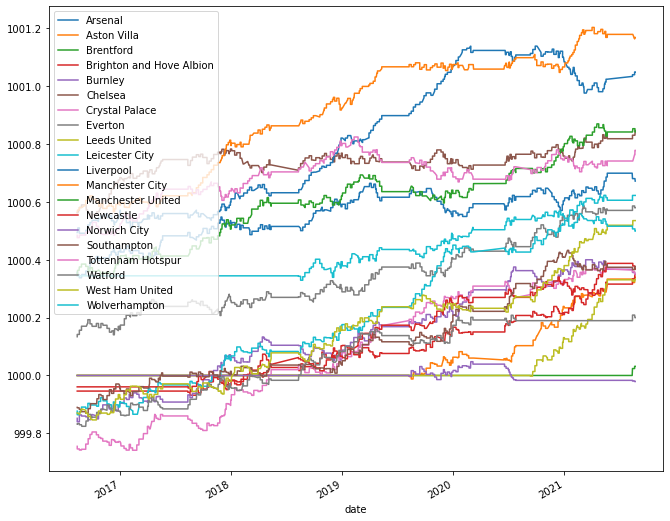

In [5]:
import numpy as np
rating_history = pd.DataFrame(model.output_['rating'],columns=elo_data.le_.classes_,index=pd.DatetimeIndex(elo_data.time)) [  np.unique(np.concatenate(data.loc[data.date>'2021-08-01',['home','away']].values))]
rating_history.plot(figsize=(11, 9.5))

In [6]:
pd.Series(model.predict_proba('Arsenal','Aston Villa'))

Arsenal        0.51308984
Draw           0.24458992
Aston Villa    0.24232021
dtype: object